Fig1u.re Q3(b) shows a shaft loaded with pulleys C and D, supported by bearings A and
B. The shaft transmits 70 kW of power at 1500 rpm to both pulleys. The diameters of
pulleys C and Dare 150 mm and 100 mm, respectively. Meanwhile, the belt tension
ratfos for pulley C and D are 2:1 and 3:2, respectively. The high-strength steel with a
yield stress of Sy::; 345 MPa is used for the shafl, with a safety factor of 2.5

i) Determ ine the belt tension on pulley C and D.

ii) Determ ine the diameter of using maximum shear stress theory of failure.

iii) If the material of the shaft changes to 600 MPa of the yield stress, suggest the
new diameter of the shaft.

In [15]:
from math import pi, sin, cos, sqrt, pow, radians, degrees, hypot
import matplotlib.pyplot as plt
import numpy as np

In [7]:
Power = 70000
nA = 1500
rC=0.075
rD = 0.05
Sy=345E+6
fos=2.5

$$P=\frac{2\pi n}{60} T$$

In [8]:
TorqueC = round(Power*60/(2*pi*nA),2)
print(f'Torque = {TorqueC} Nm')

Torque = 445.63 Nm


$$T=(F_1-F_2)r$$
$$F_1=2F_2$$
$$T=(2F_2-F_2)r$$
$$T=(F_2)r$$

In [11]:
F2=round(TorqueC/rC,2)
print(f'F2 = {F2} N')
F1=2*F2
print(f'F1 = {F1} N')

F2 = 5941.73 N
F1 = 11883.46 N


$$T=(F_3-F_4)r$$
$$F_3=\frac{3}{2}F_4$$
$$T=(1.5F4-F_4)r$$
$$T=(0.5F4)r$$

In [14]:
F4=round(TorqueC/rD,2)
print(f'F4 = {F4} N')
F3=round(1.5*F4,2)
print(f'F3 = {F3} N')

F4 = 8912.6 N
F3 = 13368.9 N


In [17]:
Fc=F1+F2
Fd=F3+F4
print(f'Fc = {Fc} N')
print(f'Fd = {Fd} N')

Fc = 17825.19 N
Fd = 22281.5 N


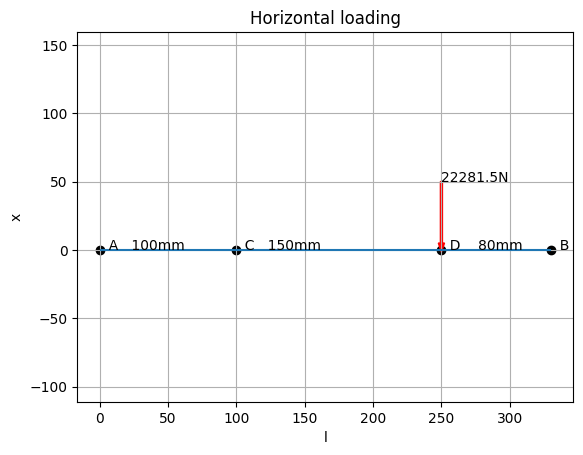

In [ ]:
coorA = [0,0]
coorB = [330,0]
coorC = [100,0]
coorD = [250,0]
loadLocation = [250,0]

data = np.array([coorA,coorB,coorC,coorD])
x, y = data.T
fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.arrow(loadLocation[0],loadLocation[1]+50, 0,-45,width=1.5,color='r')
ax.hlines(0,0,330)

ax.set(xlabel='l', ylabel='x',
       title='Horizontal loading')

ax.text(loadLocation[0],loadLocation[1]+50,f'{Fd}N')
ax.text(coorA[0],coorA[1],f'  A     100mm')
ax.text(coorB[0],coorB[1],f'  B')
ax.text(coorC[0],coorC[1],f'  C     150mm')
ax.text(coorD[0],coorD[1],f'  D    80mm')

plt.axis('equal')
plt.show()

Calculate reaction force at A and B

$$+\uparrow \sum F_x=0$$
$$A_x+B_x-22281.5=0$$

$$+\circlearrowleft \sum M_b=0$$
$$-A_x(330)+22281.5(80)=0$$
$$A_x=22281.5(80)/330$$

In [30]:
ab = 330
db = 80
Ax=round(Fd*db/ab,2)
print(f'Ax = {Ax} N')

Ax = 5401.58 N


In [31]:
Bx = Fd-Ax
print(f'Bx = {Bx} N')

Bx = 16879.92 N


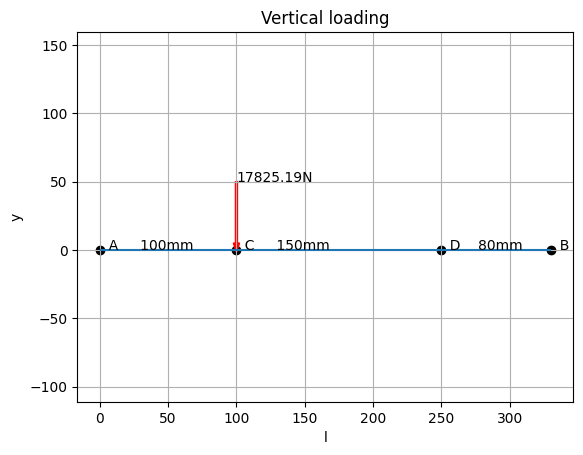

In [33]:
coorA = [0,0]
coorB = [330,0]
coorC = [100,0]
coorD = [250,0]
loadLocation = [100,0]

data = np.array([coorA,coorB,coorC,coorD])
x, y = data.T
fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.arrow(loadLocation[0],loadLocation[1]+50, 0,-45,width=1.5,color='r')
ax.hlines(0,0,330)

ax.set(xlabel='l', ylabel='y',
       title='Vertical loading')

ax.text(loadLocation[0],loadLocation[1]+50,f'{Fc}N')
ax.text(coorA[0],coorA[1],f'  A     100mm')
ax.text(coorB[0],coorB[1],f'  B')
ax.text(coorC[0],coorC[1],f'  C     150mm')
ax.text(coorD[0],coorD[1],f'  D    80mm')

plt.axis('equal')
plt.show()

$$+\uparrow \sum F_y=0$$
$$A_y+B_y-17825.19=0$$

$$+\circlearrowleft \sum M_b=0$$
$$-A_y(330)+17825.19(230)=0$$
$$A_y=17825.19(230)/330$$

In [34]:
ab = 330
cb = 230
Ay=round(Fc*cb/ab,2)
print(f'Ay = {Ay} N')

Ay = 12423.62 N


In [36]:
By = round(Fc-Ay,2)
print(f'By = {By} N')

By = 5401.57 N


In [37]:
Atotal = round(hypot(Ax,Ay),2)
Btotal = round(hypot(Bx,By),2)
print(f'A = {Atotal} N')
print(f'B = {Btotal} N')

A = 13547.08 N
B = 17723.11 N
